# The Ultimate Guide to Amazon Baby Products: Essentials for New Parents
## Baby Bliss: Premium Products for Happy, Healthy Infants

In [2]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
df = pd.read_csv("Baby Products.csv")


In [4]:
# Display the first few rows of the DataFrame
print(df.head())

                                                name         main_category  \
0  Supples Baby Pants Diapers, Medium (7-12 kg), ...  toys & baby products   
1  Pampers Active Baby Taped Diapers, Medium size...  toys & baby products   
2  Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...  toys & baby products   
3  Mamaearth Gentle Cleansing Shampoo for Babies ...  toys & baby products   
4      Himalaya Extra Moisturizing Baby Wash, 400 ml  toys & baby products   

    sub_category                                              image  \
0  Baby Products  https://m.media-amazon.com/images/W/IMAGERENDE...   
1  Baby Products  https://m.media-amazon.com/images/W/IMAGERENDE...   
2  Baby Products  https://m.media-amazon.com/images/W/IMAGERENDE...   
3  Baby Products  https://m.media-amazon.com/images/W/IMAGERENDE...   
4  Baby Products  https://m.media-amazon.com/images/W/IMAGERENDE...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/S

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1056 non-null   object
 1   main_category   1056 non-null   object
 2   sub_category    1056 non-null   object
 3   image           1056 non-null   object
 4   link            1056 non-null   object
 5   ratings         1044 non-null   object
 6   no_of_ratings   1044 non-null   object
 7   discount_price  964 non-null    object
 8   actual_price    1049 non-null   object
dtypes: object(9)
memory usage: 74.4+ KB
None


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
name               0
main_category      0
sub_category       0
image              0
link               0
ratings           12
no_of_ratings     12
discount_price    92
actual_price       7
dtype: int64


In [7]:
# Option 1: Drop rows with any missing values
# df.dropna(inplace=True)

# Option 2: Fill missing values
# Fill numerical columns with the mean
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill categorical columns with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_13072\323745504.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [8]:
# Remove duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1056 non-null   object
 1   main_category   1056 non-null   object
 2   sub_category    1056 non-null   object
 3   image           1056 non-null   object
 4   link            1056 non-null   object
 5   ratings         1056 non-null   object
 6   no_of_ratings   1056 non-null   object
 7   discount_price  1056 non-null   object
 8   actual_price    1056 non-null   object
dtypes: object(9)
memory usage: 74.4+ KB


In [10]:
# Step 1: Convert ratings and price columns to numeric types
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', '').str.strip(), errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'].str.replace('₹', '').str.replace(',', '').str.strip(), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('₹', '').str.replace(',', '').str.strip(), errors='coerce')


## Feature engineering

In [11]:
# Calculate Discount Percentage
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# Calculate Price Difference
df['price_difference'] = df['actual_price'] - df['discount_price']

In [12]:
# 1. Summary Statistics
df['mean_rating'] = df['ratings'].mean()
df['median_rating'] = df['ratings'].median()
df['std_rating'] = df['ratings'].std()
df['variance_rating'] = df['ratings'].var()

In [13]:
# 2. Aggregate Features
average_rating_by_category = df.groupby('main_category')['ratings'].mean().reset_index()
average_rating_by_category.columns = ['main_category', 'average_category_rating']
df = pd.merge(df, average_rating_by_category, on='main_category', how='left')

In [14]:
# 5. Ratios
df['discount_ratio'] = df['discount_price'] / df['actual_price']

## Business Analysis Features

In [15]:
# 1. Profit Margin
df['profit_margin'] = (df['actual_price'] - df['discount_price']) / df['actual_price'] * 100

In [16]:
# 2. Sales Potential
df['sales_potential'] = df['ratings'] * df['no_of_ratings']

# 3. Price Sensitivity
df['price_sensitivity'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# 4. Popularity Index
df['popularity_index'] = df['ratings'] * df['no_of_ratings']

# 5. Category Penetration Rate
category_count = df.groupby('main_category')['no_of_ratings'].sum().reset_index()
category_count.columns = ['main_category', 'category_total_ratings']
df = pd.merge(df, category_count, on='main_category', how='left')
df['category_penetration_rate'] = df['no_of_ratings'] / df['category_total_ratings']

# 6. Discount Amount
df['discount_amount'] = df['actual_price'] - df['discount_price']


In [17]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,...,variance_rating,average_category_rating,discount_ratio,profit_margin,sales_potential,price_sensitivity,popularity_index,category_total_ratings,category_penetration_rate,discount_amount
0,"Supples Baby Pants Diapers, Medium (7-12 kg), ...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Supples-Pants-Diapers-Me...,4.0,127863.0,639.0,949,32.665964,...,0.158905,4.090684,0.673340,32.665964,511452.0,32.665964,511452.0,6626392.0,0.019296,310.0
1,"Pampers Active Baby Taped Diapers, Medium size...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pampers-Active-Medium-Di...,4.5,65629.0,1529.0,1699,10.005886,...,0.158905,4.090684,0.899941,10.005886,295330.5,10.005886,295330.5,6626392.0,0.009904,170.0
2,"Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-HydraGel-Sunsc...,4.0,4897.0,346.0,399,13.283208,...,0.158905,4.090684,0.867168,13.283208,19588.0,13.283208,19588.0,6626392.0,0.000739,53.0
3,Mamaearth Gentle Cleansing Shampoo for Babies ...,toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mamaearth-Gentle-Cleansi...,4.3,19845.0,152.0,199,23.618090,...,0.158905,4.090684,0.763819,23.618090,85333.5,23.618090,85333.5,6626392.0,0.002995,47.0
4,"Himalaya Extra Moisturizing Baby Wash, 400 ml",toys & baby products,Baby Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Himalaya-Extra-Moisturiz...,4.3,6456.0,198.0,275,28.000000,...,0.158905,4.090684,0.720000,28.000000,27760.8,28.000000,27760.8,6626392.0,0.000974,77.0


In [18]:
# Remove 'image' and 'link' columns from the DataFrame
df.drop(columns=['image', 'link'], inplace=True)

In [19]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,price_difference,mean_rating,...,variance_rating,average_category_rating,discount_ratio,profit_margin,sales_potential,price_sensitivity,popularity_index,category_total_ratings,category_penetration_rate,discount_amount
0,"Supples Baby Pants Diapers, Medium (7-12 kg), ...",toys & baby products,Baby Products,4.0,127863.0,639.0,949,32.665964,310.0,4.090684,...,0.158905,4.090684,0.673340,32.665964,511452.0,32.665964,511452.0,6626392.0,0.019296,310.0
1,"Pampers Active Baby Taped Diapers, Medium size...",toys & baby products,Baby Products,4.5,65629.0,1529.0,1699,10.005886,170.0,4.090684,...,0.158905,4.090684,0.899941,10.005886,295330.5,10.005886,295330.5,6626392.0,0.009904,170.0
2,"Mamaearth Hydragel Indian Sunscreen Spf 50, Wi...",toys & baby products,Baby Products,4.0,4897.0,346.0,399,13.283208,53.0,4.090684,...,0.158905,4.090684,0.867168,13.283208,19588.0,13.283208,19588.0,6626392.0,0.000739,53.0
3,Mamaearth Gentle Cleansing Shampoo for Babies ...,toys & baby products,Baby Products,4.3,19845.0,152.0,199,23.618090,47.0,4.090684,...,0.158905,4.090684,0.763819,23.618090,85333.5,23.618090,85333.5,6626392.0,0.002995,47.0
4,"Himalaya Extra Moisturizing Baby Wash, 400 ml",toys & baby products,Baby Products,4.3,6456.0,198.0,275,28.000000,77.0,4.090684,...,0.158905,4.090684,0.720000,28.000000,27760.8,28.000000,27760.8,6626392.0,0.000974,77.0


## Visualization

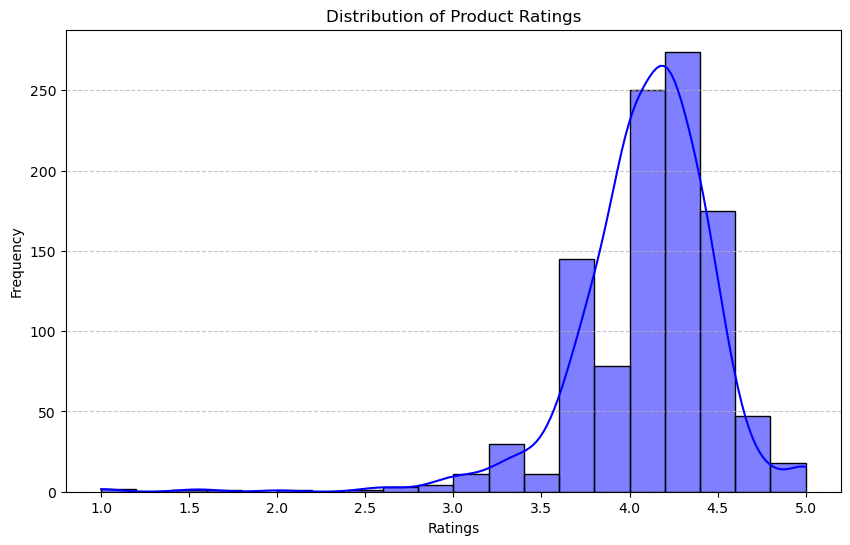

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=20, kde=True, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


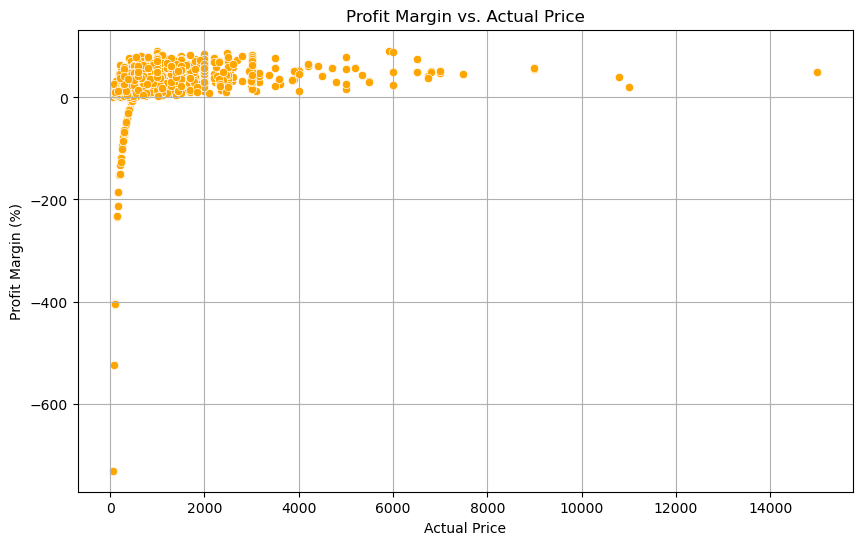

In [22]:
# Visualization 2: Profit Margin vs. Actual Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='profit_margin', data=df, color='orange')
plt.title('Profit Margin vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Profit Margin (%)')
plt.grid()
plt.show()


C:\Users\RAMEEN SHAHID\AppData\Local\Temp\ipykernel_13072\3014529514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='main_category', y='discount_percentage', data=average_discount, palette='viridis')


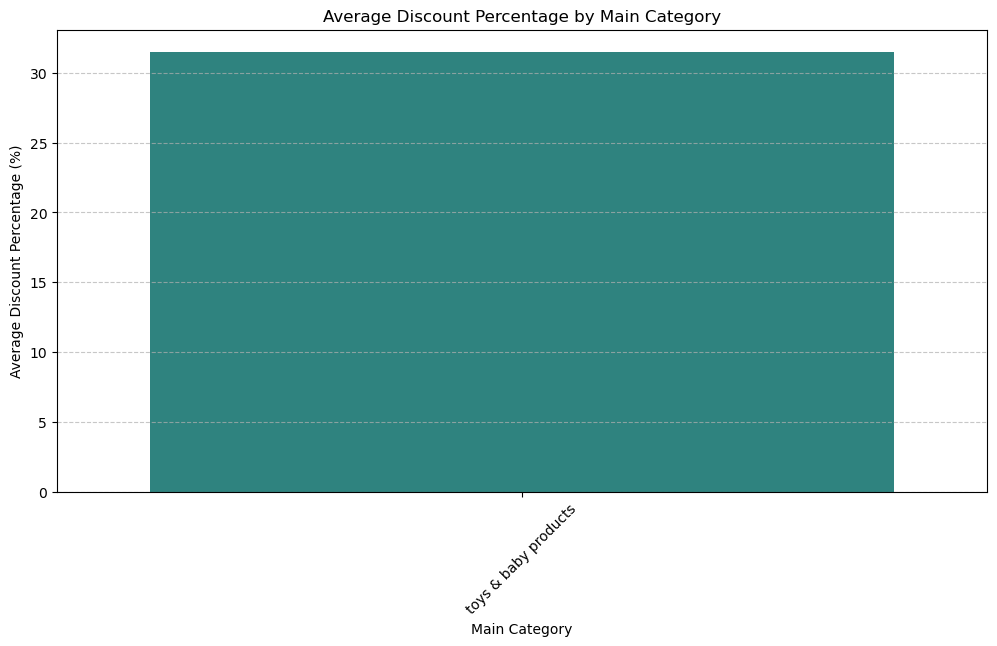

In [23]:
# Visualization 3: Average Discount Percentage by Category
average_discount = df.groupby('main_category')['discount_percentage'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='main_category', y='discount_percentage', data=average_discount, palette='viridis')
plt.title('Average Discount Percentage by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# Save the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Baby_Products.csv', index=False)